In [1]:
# Import packages
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Tell notebook server to show plots inline
%matplotlib inline


In [2]:
y_dat = np.array([42.45, 59.32, 93.06, 126.80, 160.54, 194.28])
y_err = np.array([0.1290, 0.1627, 0.3241, 0.5120, 0.7056, 0.9012])

x_dat = np.array([0.55145476, 0.81108036, 1.32526144, 1.817104, 2.32806564, 2.84057316])
x_err = np.array([0.00251, 0.00465, 0.01459, 0.00615, 0.02128, 0.02152])


In [3]:
def model_lin(x, m, c):
    return m * x + c

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 


In [4]:
# Here we shall be calculating non-weighted fits for y-error estimation

mInit = 0.5
cInit = 0.2

parameters, covariance = opt.curve_fit(model_lin, x_dat, y_dat, p0=[mInit,cInit]) # Simple regression

slope_s = parameters[0] # Simple regression slope


In [5]:
# Here we shall be calculating the adjusted error in y to account for our error in x,
# based on the slope from our simple regression model

y_err_adj = np.sqrt(y_err ** 2 + ( slope_s * x_err ) ** 2 )


In [6]:
# We will now calculate our weighted regression model, using the methods described 
# in the lab notebook provided for lab 4 and our adjusted y error

mInit = 0.5
cInit = 0.2

# Weighted regression. Note we use linear model still, as we have already linearized our data to (T^2, I)
parameters, covariance = opt.curve_fit(model_lin, x_dat, y_dat, p0=[mInit,cInit], sigma=y_err_adj, absolute_sigma=True)

slope = parameters[0] # Weighted regression slope
intcp = parameters[1] # Weighted regression intercept
slope_err = np.sqrt(covariance[0][0]) # Weighted regression slope error
intcp_err = np.sqrt(covariance[1][1]) # Weighted regression intercep error

y_model = model_lin(x_dat, slope, intcp) # Y values predicted with our model
norm_res = norm_res(y_model, y_dat, y_err_adj) # Calculates normalized residuals
chi2 = np.sum(norm_res ** 2) # Calculates Chi Squared, via slight rearranging of formula to save computation


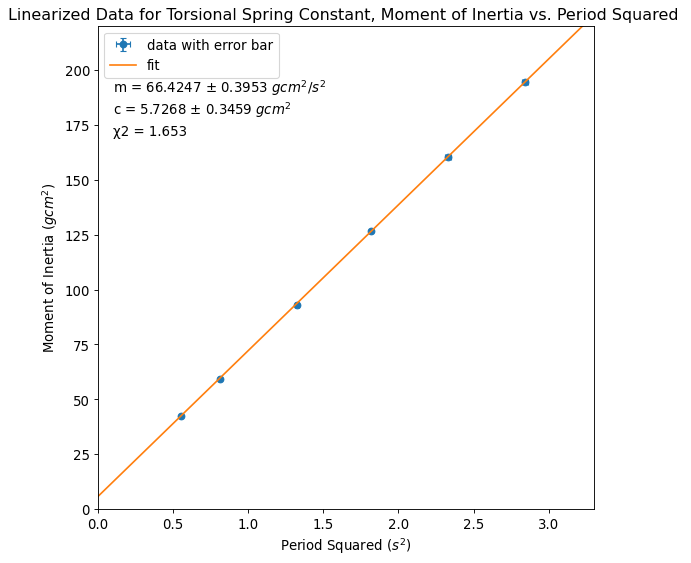

In [13]:
# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(x_dat, y_dat, xerr=x_err, yerr=y_err, fmt='o', capsize = 3, capthick = 1, label="data with error bar")
plt.errorbar(np.linspace(0,10), model_lin(np.linspace(0,10), slope, intcp), label='fit')

plt.title("Linearized Data for Torsional Spring Constant, Moment of Inertia vs. Period Squared ")
plt.xlabel("Period Squared ($s^2$)")
plt.ylabel("Moment of Inertia ($gcm^2$)")

plt.text(0.1,190, "m = %5.4f \u00b1 %5.4f $g cm^2/s^2$" % (slope, slope_err))
plt.text(0.1,180, "c = %5.4f \u00b1 %5.4f $gcm^2$" % (intcp, intcp_err))
plt.text(0.1,170, "χ2 = %5.3f" % chi2)
plt.xlim(0, 3.3)
plt.ylim(0, 220)
plt.legend()
plt.show()


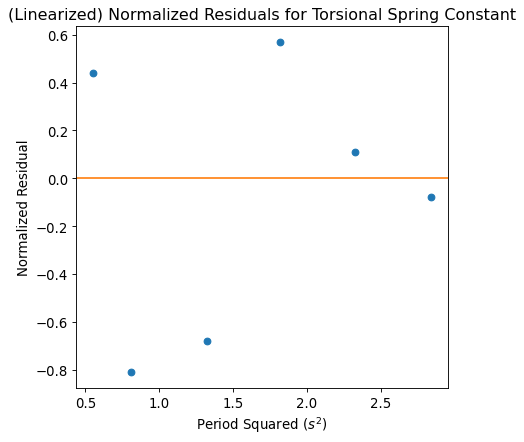

In [8]:
# Plotting residuals time!

fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(x_dat, norm_res, fmt='o')
plt.axhline(color='tab:orange')

plt.title("(Linearized) Normalized Residuals for Torsional Spring Constant")
plt.xlabel("Period Squared ($s^2$)")
plt.ylabel("Normalized Residual")
plt.show()


In [9]:
# Quick sanity check to check this method against the formula for just the slope

# w = weights, x = x_data y = y_data

def slope_via_equation(x, y, w):
    num = np.sum(w) * np.sum(w * x * y) - np.sum(w * x) * np.sum(w * y)
    den = np.sum(w) * np.sum(w * x ** 2) - np.sum(w * x) ** 2
    return num / den

def slope_err_via_equation(x, y, w):
    den = np.sum(w) * np.sum(w * x ** 2) - np.sum(w * x) ** 2
    return np.sqrt( np.sum(w) / den )

weight = 1 / y_err_adj ** 2
m = slope_via_equation(x_dat, y_dat, weight)
m_err = slope_err_via_equation(x_dat, y_dat, weight)

print("Using the given equations, the slope is %5.4f and the slope error is %5.4f" % (m, m_err))
print("This agrees exactly with the results of the scipy optimization function")


Using the given equations, the slope is 66.4247 and the slope error is 0.3953
This agrees exactly with the results of the scipy optimization function
